### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=4
max_qubits=8
max_circuits=1
num_shots=1000

backend_id="pegasus"
#hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# An example using D-Wave Neal simulator
from neal import SimulatedAnnealingSampler
provider_backend = SimulatedAnnealingSampler()
backend_id="pegasus"

# # An example using D-Wave provider
# # Be sure to set the DWAVE_API_TOKEN environment variable
# from dwave.system.samplers import DWaveSampler
# from dwave.system import DWaveSampler, EmbeddingComposite, FixedEmbeddingComposite
# provider_backend = DWaveSampler(token=token, solver={'topology__type': backend["backend_id"]})
# backend_id="dwave_qpu"

# # *** Use these settings for better results
# min_qubits=4
# max_qubits=10
# max_circuits=2
# num_shots=50000

In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Add Qiskit pass manager as a custom 'transformer' method
# import _common.transformers.qiskit_passmgr as qiskit_passmgr
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre', "transformer": qiskit_passmgr.do_transform }

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Maxcut - Method 1

In [3]:
# import sys
# sys.path.insert(1, "maxcut/qiskit")
# import maxcut_benchmark

# # set noise to None for testing
# import execute
# execute.set_noise_model(None)

# maxcut_benchmark.run(
#     min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
#     method=1, rounds=1,
#     backend_id=backend_id, provider_backend=provider_backend,
#     hub=hub, group=group, project=project, exec_options=exec_options
# )

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

dict_of_inputs = {'min_qubits': 4, 'max_qubits': 8, 'max_circuits': 1, 'num_shots': 1000, 'method': 2, 'rounds': 1, 'degree': 3, 'alpha': 0.1, 'thetas_array': None, 'parameterized': False, 'do_fidelities': True, 'max_iter': 30, 'score_metric': ['approx_ratio'], 'x_metric': ['cumulative_exec_time', 'cumulative_elapsed_time'], 'y_metric': 'num_qubits', 'fixed_metrics': {}, 'num_x_bins': 15, 'y_size': None, 'x_size': None, 'objective_func_type': 'approx_ratio', 'plot_results': True, 'save_res_to_file': False, 'save_final_counts': False, 'detailed_save_names': False, 'comfort': False, 'backend_id': 'pegasus', 'eta': 0.5, 'exec_options': None, '_instances': None}
MaxCut Benchmark Program - Ocean
... execution starting at Nov 03, 2022 19:39:22 UTC
... using backend_id = pegasus
************
Executing [1] restarts for num_qubits = 4
===============  Begin method 2 loop, enabling embed
... using anneal time: 1
... submit circuit - group=4 id=1000 shots=1000 params=[1]
... finalize_execution
**

C:\Users\toml\QCI-TL\github\QC-App-Oriented-Benchmarks-maxcut-dwave\maxcut\ocean\../../_common\metrics.py:2110: RuntimeWarning: invalid value encountered in true_divide
  group_metrics_optgaps['random_cutsize_ratio_dist']['frequencies'].append(np.array(full_counts_list_unif) / sum(full_counts_list_unif))


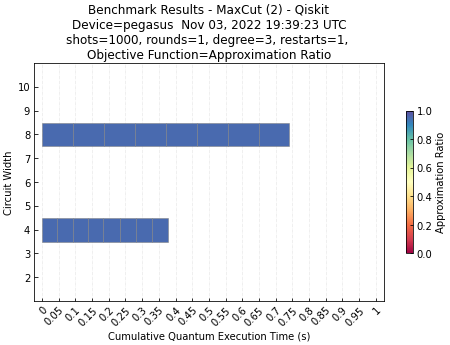

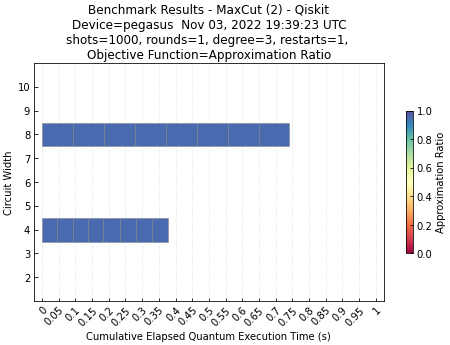

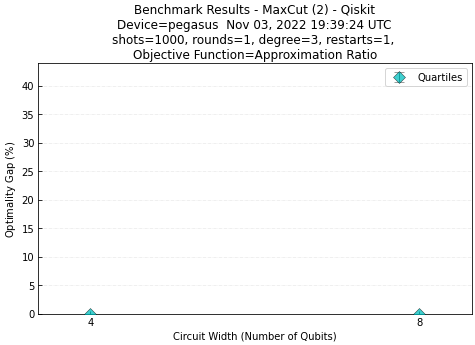

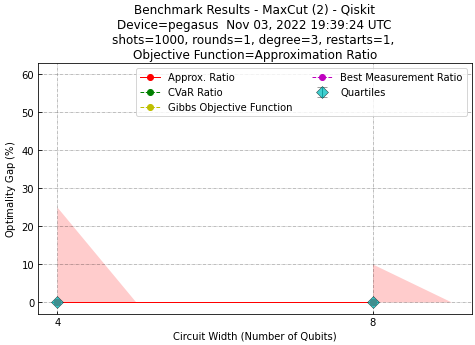

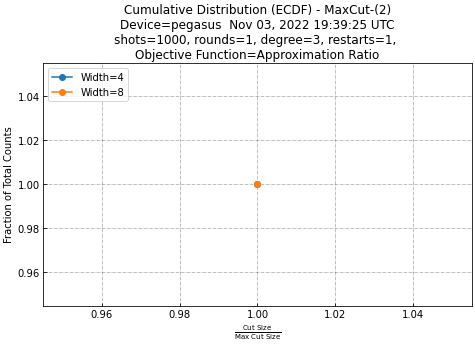

C:\Users\toml\QCI-TL\github\QC-App-Oriented-Benchmarks-maxcut-dwave\maxcut\ocean\../../_common\metrics.py:2110: RuntimeWarning: invalid value encountered in true_divide
  group_metrics_optgaps['random_cutsize_ratio_dist']['frequencies'].append(np.array(full_counts_list_unif) / sum(full_counts_list_unif))


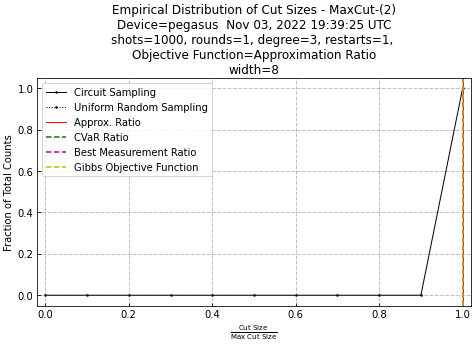

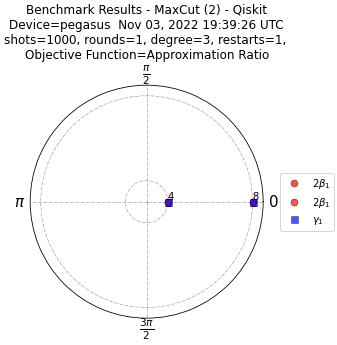

In [4]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
# import execute
# execute.set_noise_model(None)

score_metric=['approx_ratio']
#x_metric=['cumulative_exec_time', 'cumulative_elapsed_time', 'cumulative_opt_exec_time']
x_metric=['cumulative_exec_time', 'cumulative_elapsed_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, degree=3,
    score_metric=score_metric, x_metric=x_metric, 
    backend_id=backend_id, provider_backend=provider_backend,
    exec_options=exec_options
)

# maxcut_benchmark.run(
#     min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
#     method=2, rounds=2, degree=3, do_fidelities=False, parameterized=False,
#     score_metric=score_metric, x_metric=x_metric, 
#     objective_func_type = objective_func_type,
#     backend_id=backend_id, provider_backend=provider_backend,
#     hub=hub, group=group, project=project, exec_options=exec_options
# )
